In [26]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts
from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.cross_validation import cross_val_predict



In [27]:
df = pd.read_csv('D:\\yelp\\data\\NO BLANKS the final countdown.csv')

In [28]:
df.head()

,_id,restaurant_name,address_full,business_id,review_count,inspection_date,stars,latitude,longitude,violations,...,Charlotte,LasVegas,neighborhood0,neighborhood1,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,
0,ObjectId(581151a8b6729e7e31355b41),MILLENNIUM FANDOM BAR,900 S Las Vegas Blvd 140 Las Vegas 89101-6826,fpIMTMrbP9CdbiGFKgt_zg,21,4/11/2013,5.0,36.0,-115.0,100,...,0,1,0,0,0,1,1,1,0,NaN
1,ObjectId(581151a7b6729e7e313507f2),KOREA HOUSE BBQ,4435 Las Vegas Blvd Las Vegas 89115-0529,To9FBacgnXPJ4GpJbnMVvA,3,10/29/2012,4.0,36.0,-115.0,91,...,0,1,0,1,1,1,1,0,0,NaN
2,ObjectId(581151a5b6729e7e3134a9db),Teriyaki Madness,725 W Craig Rd North Las Vegas 89032-6199,aYpqQ3qoSe5WZb7p47UzhQ,93,9/9/2016,4.0,36.0,-115.0,81,...,0,1,0,1,1,1,1,0,0,NaN
3,ObjectId(581151a4b6729e7e3134608e),New China Buffet,1510 E Flamingo Rd Las Vegas 89119-5253,kUtoL4B9BBVgViPHk9B8EQ,15,6/14/2010,2.0,36.0,-115.0,70,...,0,1,0,0,1,0,0,1,0,NaN
4,ObjectId(581151a4b6729e7e31345ca4),at Your Service Catering,633 N Decatur Blvd Las Vegas 89107,06josjy-7BArm83sp43TnQ,3,5/24/2012,5.0,36.0,-115.0,69,...,0,1,0,1,1,1,1,0,0,NaN


In [5]:
df.shape

(49165, 67)

In [6]:
df.describe()

,review_count,stars,latitude,longitude,violations,ChangeInViolations,IsAsian,IsFrench,IsSandwiches,IsFastFood,...,Charlotte,LasVegas,neighborhood0,neighborhood1,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,
count,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,...,49165.000000,49165.000000,49165.0,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,0.0
mean,123.360216,3.619963,39.101888,-88.701983,7.133774,-0.312133,0.198841,0.006692,0.114573,0.055161,...,0.117136,0.374819,0.0,0.592739,0.519374,0.675013,0.545164,0.357999,0.451968,NaN
std,181.552585,0.707351,3.305015,20.586998,8.212155,7.928295,0.399132,0.081530,0.318510,0.228297,...,0.321586,0.484081,0.0,0.491329,0.499630,0.468375,0.497961,0.479417,0.497693,NaN
min,3.000000,1.000000,33.000000,-115.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,22.000000,3.000000,36.000000,-115.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,63.000000,4.000000,42.272129,-71.163815,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,NaN
75%,150.000000,4.000000,42.348663,-71.070510,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
max,1922.000000,5.000000,42.389913,-70.996696,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df.mean()

review_count          123.591036
stars                   3.622213
latitude               39.080397
longitude             -88.884180
violations              7.131305
ChangeInViolations     -0.311581
IsAsian                 0.198978
IsFrench                0.006686
IsSandwiches            0.114123
IsFastFood              0.055506
IsBurgers               0.041246
IsItalian               0.060011
IsHawaiian              0.012059
IsSouthern              0.008180
IsMexican               0.088915
IsLatinAmerican         0.000000
IsMiddleEastern         0.009998
IsGreek                 0.010322
IsAmerican              0.127070
IsDonuts                0.032480
IsIndian                0.014058
IsSeafood               0.034015
IsDesserts              0.012685
IsSalad                 0.021835
Pizza                   0.123010
IsBuffets               0.007150
IsSushiBars             0.030500
IsDelis                 0.019896
IsSports Bars           0.015169
IsBakeries              0.024299
          

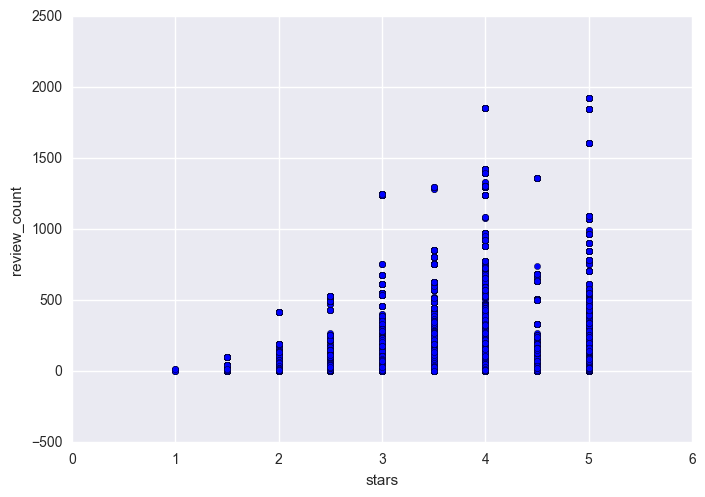

In [7]:
x = df['stars']
y = df['review_count']
plt.ylabel('review_count')
plt.xlabel('stars')
plt.scatter(x,y)

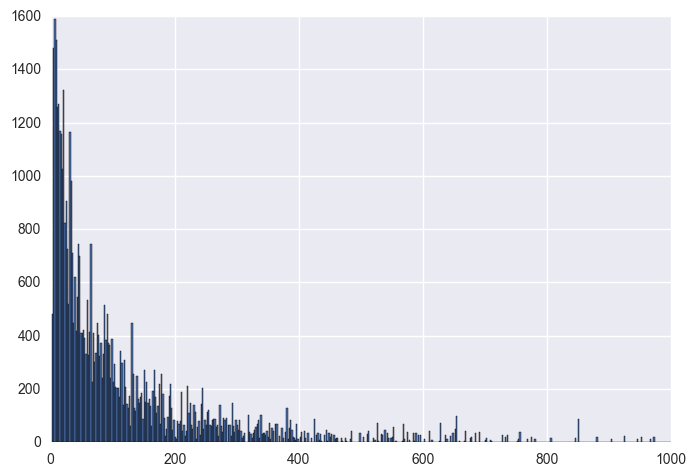

In [8]:
x = df['review_count']
x.xlabel= ('review_count')
x.hist(bins=500, range = [0, 1000])

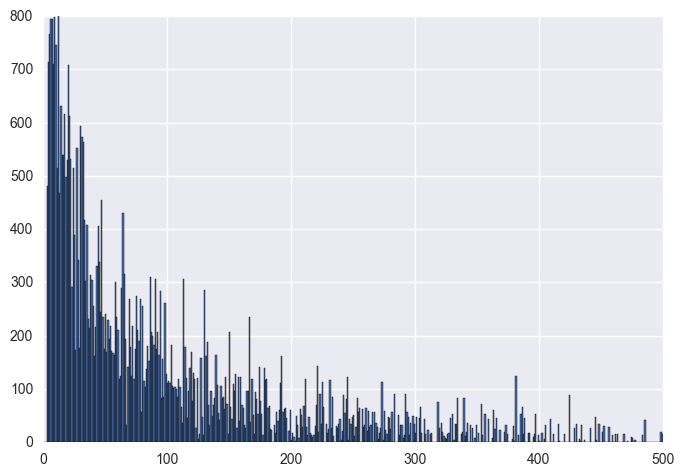

In [9]:
x = df['review_count']
x.xlabel= ('review_count')
x.hist(bins=500, range = [0, 500])

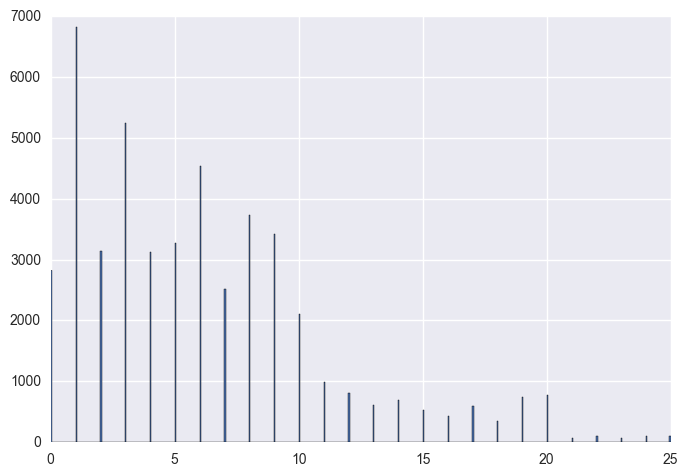

In [11]:
x = df['violations']
plt.xlabel= ('violations')
x.hist(bins=500, range = [0, 25])

In [12]:
x=np.arange('violations', 'review_count')
plt.plot(x)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

(0, 25)

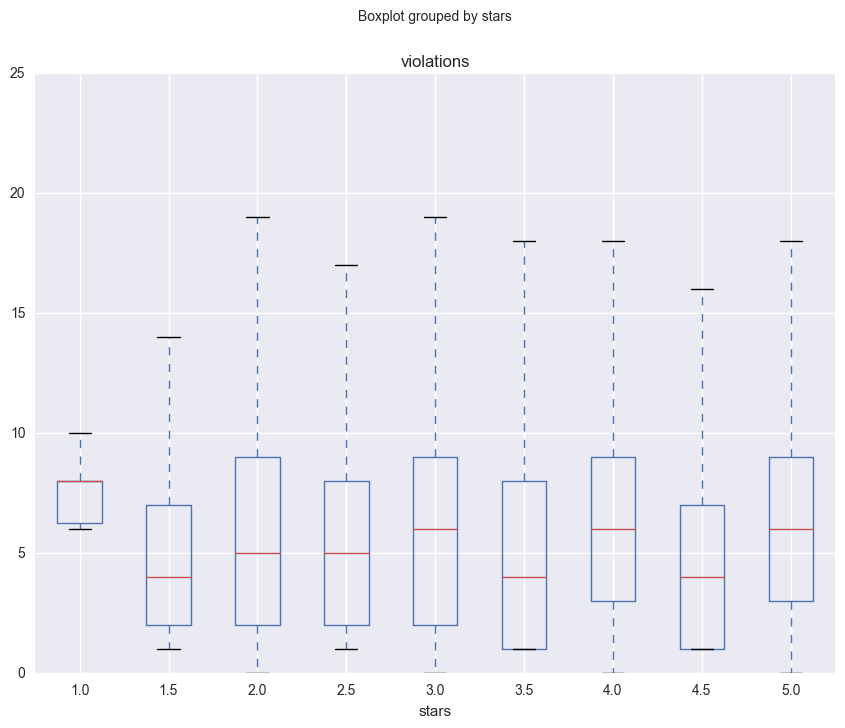

In [78]:
df.boxplot('violations', by='stars', figsize =(10,8))
plt.ylabel=('violations')
plt.ylim(0,25)

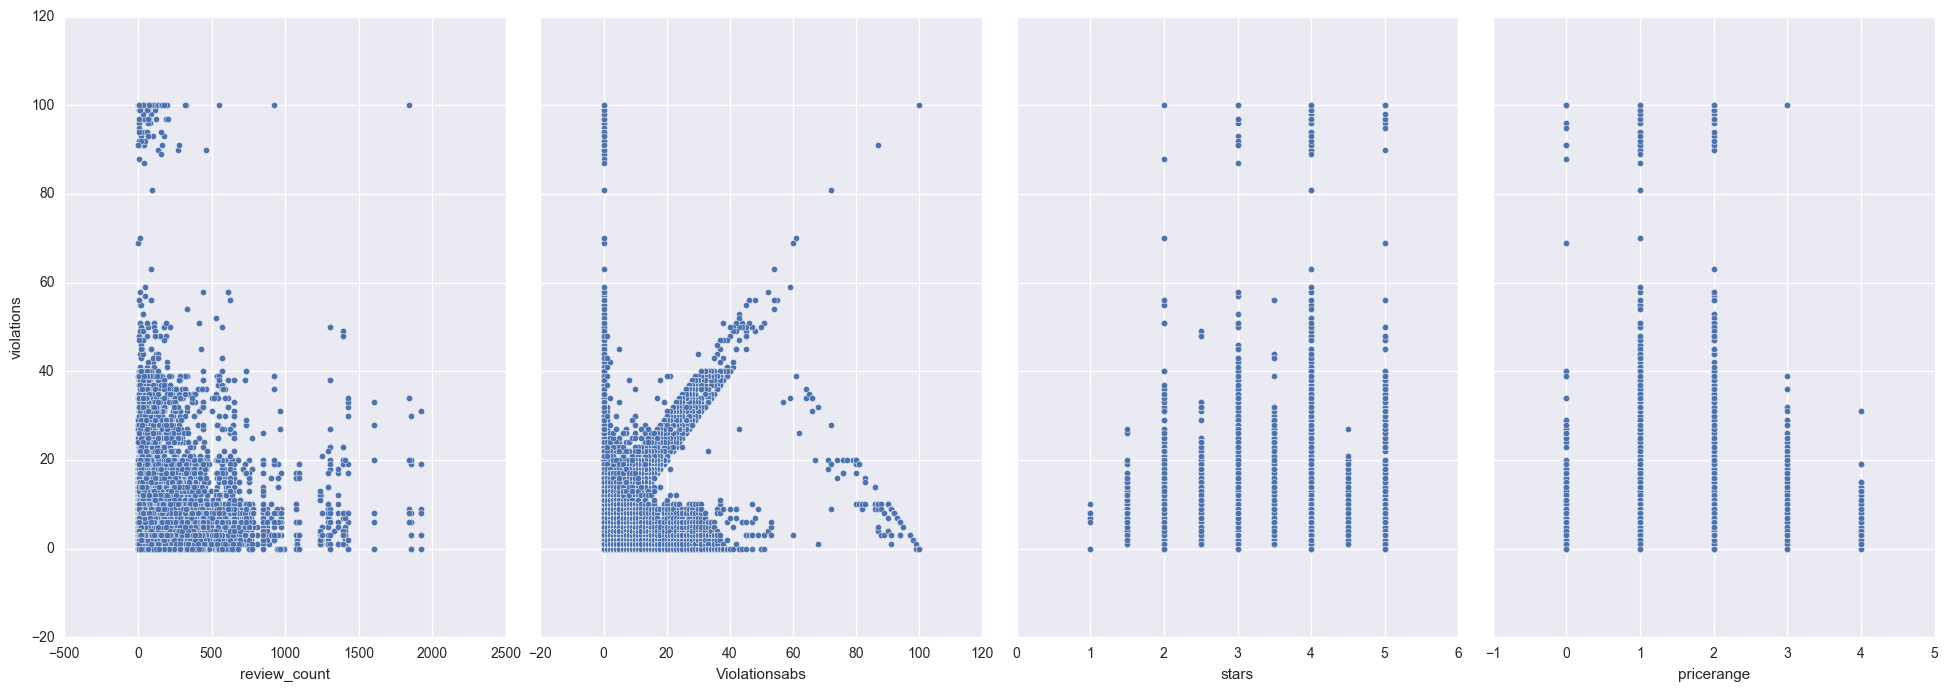

In [30]:
sns.pairplot(df, x_vars=['review_count','Violationsabs', 'stars', 'pricerange'], y_vars='violations', size=7, aspect=0.7)

In [31]:
# data   = df.ix[:, df.columns != 'violations']
# data = df[['review_count', 'stars', 'ChangeInViolations', 'IsAsian', 'Pizza', 'Boston', 'LasVegas', 'Charlotte', 'pricerange', 'upscale', 'divey', 'alcohol', 'neighborhood0', 'neighborhood1', 'neighborhood2', 'neighborhood3', 'neighborhood4', 'neighborhood5', 'neighborhood6']]
data = df[['Violationsabs']]
target = df['violations']
data.head()
target.head()

0    100
1     91
2     81
3     70
4     69
Name: violations, dtype: int64

In [32]:
splits = cv.train_test_split(data, target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [33]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Ridge Regression model
Mean Squared Error: 64.220
Coefficient of Determination: 0.032


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Linear Regression model
Mean Squared Error: 64.220
Coefficient of Determination: 0.032


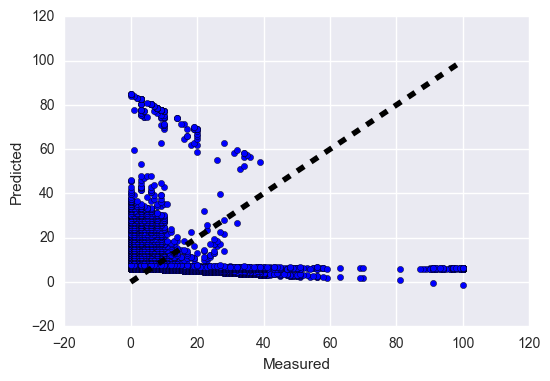

In [35]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, data, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [36]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model
Mean squared error = 62.228
R2 score = 0.062


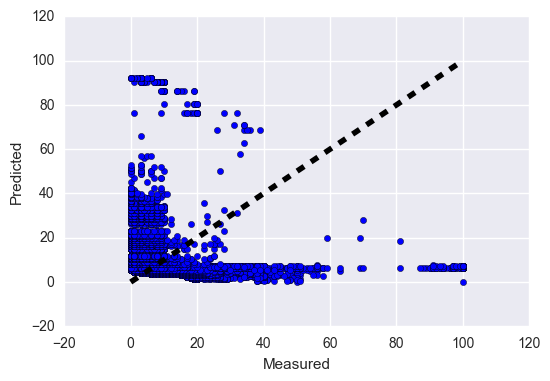

In [37]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, data, target, cv=10)

fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [107]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

expected  = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Mean Squared Error: 47.652
Coefficient of Determination: 0.197


In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()